In [13]:
using HorizonSideRobots
using PyPlot
pygui(true)
r = Robot()
show!(r)

┌ Warning: Окно с предыдущей обстановкой при открытии нового было автоматически закрыто
└ @ HorizonSideRobots C:\Users\slava\.julia\packages\HorizonSideRobots\tWWme\src\HorizonSideRobots.jl:186


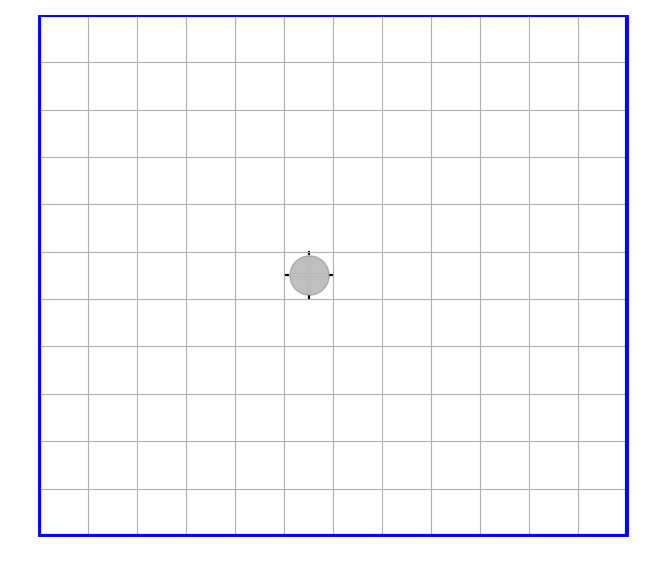

In [14]:
show(r)

In [27]:
function left_side(side)
    return HorizonSide(mod(Int(side) + 1 + 4, 4))
end
function right_side(side)
    return HorizonSide(mod(Int(side) - 1 + 4, 4))
end
function inverse(side)
    return HorizonSide(mod(Int(side) + 2, 4))
end
function mark_line(r, side, dif)
    res = 0
    while !isborder(r, side)
        res += dif
        move!(r, side)
        putmarker!(r)
    end
    return res
end

function get_to_start(r, side, x, y)
    for i in (1:x)
        move!(r, inverse(side))
    end
    y = abs(y)
    for i in (1:y)
        move!(r, inverse(right_side(side)))
    end
end
    
function complete_side(r, side)
    x = 0
    while(!isborder(r, side))
        x += 1
        move!(r, side)
    end
    putmarker!(r)
    y = 0
    y += mark_line(r, left_side(side), 1)
    y += mark_line(r, right_side(side), -1)
    get_to_start(r, side, x, y)
end

for i in (0:3)
    complete_side(r, HorizonSide(i))
end

┌ Warning: Окно с предыдущей обстановкой при открытии нового было автоматически закрыто
└ @ HorizonSideRobots C:\Users\slava\.julia\packages\HorizonSideRobots\tWWme\src\HorizonSideRobots.jl:186


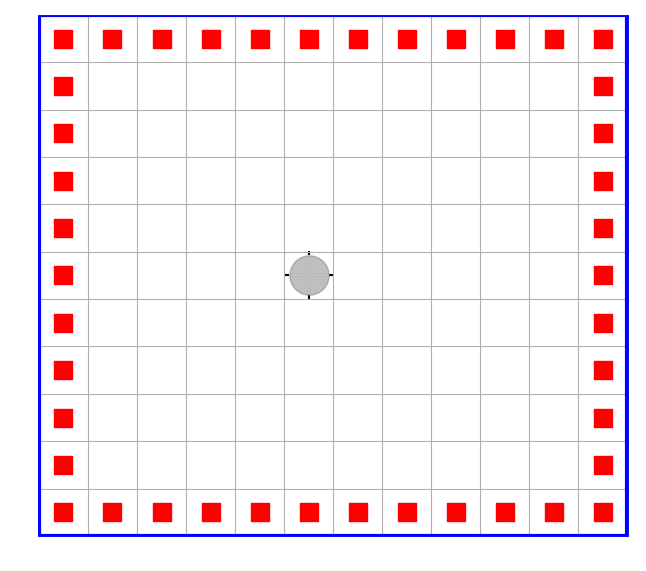

In [28]:
show(r)